## 1. Import Libraries

### Purpose:
Import essential Python libraries for data manipulation, visualization, and file system operations.

### Libraries Used:
- **pandas**: Data manipulation and analysis (DataFrames)
- **matplotlib.pyplot**: Core plotting functionality for creating visualizations
- **seaborn**: Statistical data visualization with enhanced aesthetics
- **os**: Operating system interface for directory and file management

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 2. Setup Visualization Directory

### Purpose:
Create a dedicated directory to store all generated visualization files.

### Why This Matters:
- Keeps project organized with separate folders for data, code, and outputs
- Ensures visualizations are saved in a consistent location
- `exist_ok=True` prevents errors if the directory already exists

In [2]:
# Create visualization directory if it doesn't exist
os.makedirs('../visualizations', exist_ok=True)

print("✓ Visualizations directory ready")

✓ Visualizations directory ready


## 3. Load Featured Data

### Purpose:
Load the preprocessed dataset containing customer information and engineered features from the feature engineering step.

### What to Expect:
- The CSV file contains customer records with various attributes
- Each row represents one customer
- Includes engineered features created in the previous data pipeline stage
- Contains the target variable `churned` (1 = churned, 0 = retained)

In [3]:
# Load featured data
df = pd.read_csv('../data/customer_churn_featured.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:\n{df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (100, 48)

Column names:
['customer_id', 'age', 'gender', 'tenure_months', 'subscription_plan', 'monthly_charges', 'total_charges', 'contract_type', 'payment_method', 'login_frequency_monthly', 'features_used', 'data_consumption_gb', 'engagement_score', 'days_since_last_activity', 'billing_issues_count', 'plan_changes', 'support_tickets', 'avg_resolution_hours', 'satisfaction_score', 'nps_score', 'churned', 'monthly_value_ratio', 'charge_per_feature', 'customer_lifetime_value', 'value_tier', 'engagement_velocity', 'login_intensity', 'data_per_login', 'activity_recency_category', 'features_utilization_rate', 'data_per_tenure', 'support_rate_annual', 'resolution_burden', 'satisfaction_gap', 'billing_risk_flag', 'complaint_ratio', 'support_satisfaction_ratio', 'nps_category', 'plan_tenure_mismatch', 'usage_plan_mismatch', 'payment_stability', 'nps_satisfaction_alignment', 'contract_value_risk', 'lifecycle_stage', 'contract_tenure_ratio', 'tenure_category', 'engagement_growt

,customer_id,age,gender,tenure_months,subscription_plan,monthly_charges,total_charges,contract_type,payment_method,login_frequency_monthly,...,plan_tenure_mismatch,usage_plan_mismatch,payment_stability,nps_satisfaction_alignment,contract_value_risk,lifecycle_stage,contract_tenure_ratio,tenure_category,engagement_growth_rate,tenure_stability
0,C001,34,Male,24,Premium,79.99,1919.76,Annual,Credit Card,22,...,0,0,1.000000,0.2,0,Early,2.0,1-2yr,4.000000,0.058824
1,C002,45,Female,6,Basic,29.99,179.94,Monthly,Bank Transfer,5,...,0,0,0.333333,0.6,0,New,6.0,0-1yr,3.571429,0.011111
2,C003,28,Male,36,Premium,79.99,2879.64,Annual,Credit Card,28,...,0,0,1.000000,0.3,0,Mature,3.0,2-3yr,2.486486,0.107143
3,C004,52,Female,3,Basic,29.99,89.97,Monthly,Credit Card,3,...,0,0,0.500000,1.5,0,New,3.0,0-1yr,4.500000,0.004808
4,C005,31,Male,1,Standard,49.99,899.82,Monthly,PayPal,15,...,0,0,1.000000,0.3,0,New,1.0,0-1yr,32.500000,0.002688


### Interpretation:
- **Dataset shape**: Total number of customers (rows) and features (columns)
- **Column names**: List of all available features in the dataset
- **Preview**: First 5 rows showing actual customer data

## 4. Data Overview

### Purpose:
Get a comprehensive summary of the dataset including data types, missing values, and basic statistics.

In [4]:
# Display dataset information
print("=== Dataset Info ===")
print(df.info())

print("\n=== Basic Statistics ===")
print(df.describe())

print("\n=== Missing Values ===")
print(df.isnull().sum())

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 100 non-null    object 
 1   age                         100 non-null    int64  
 2   gender                      100 non-null    object 
 3   tenure_months               100 non-null    int64  
 4   subscription_plan           100 non-null    object 
 5   monthly_charges             100 non-null    float64
 6   total_charges               100 non-null    float64
 7   contract_type               100 non-null    object 
 8   payment_method              100 non-null    object 
 9   login_frequency_monthly     100 non-null    int64  
 10  features_used               100 non-null    int64  
 11  data_consumption_gb         100 non-null    float64
 12  engagement_score            100 non-null    float64
 13  days_since_last

### Interpretation:
- **Dataset Info**: Shows data types and memory usage
- **Basic Statistics**: Mean, std, min, max for numeric columns
- **Missing Values**: Identifies any columns with null values (should be 0 after cleaning)

## 5. Churn Distribution Analysis

### Purpose:
Visualize the distribution of churned vs. retained customers to understand class balance.

### Why This Matters:
- **Class Imbalance**: If one class heavily outweighs the other, it affects model training
- **Business Context**: Churn rate is a key business metric
- **Model Evaluation**: Helps determine appropriate evaluation metrics (accuracy may be misleading with imbalanced data)

### Visualization Details:
- Bar chart showing count of churned (1) vs. retained (0) customers
- Saved as high-resolution PNG (300 DPI) for reports

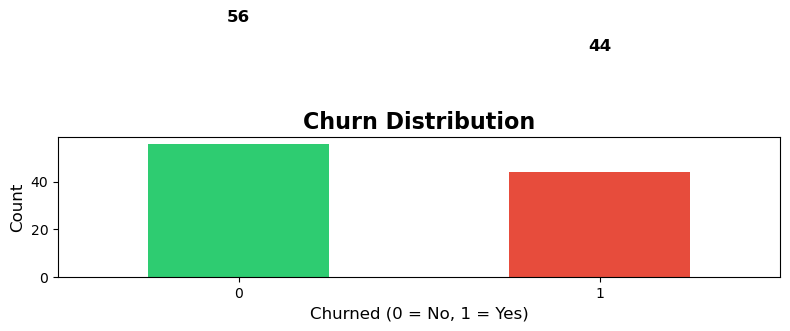


📊 Churn Rate: 44.00%
   Churned Customers: 44
   Retained Customers: 56


In [5]:
# Visualize churn distribution
plt.figure(figsize=(8, 6))
churn_counts = df['churned'].value_counts()
churn_counts.plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Churn Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Churned (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)

# Add value labels on bars
for i, v in enumerate(churn_counts):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../visualizations/churn_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate and display churn rate
churn_rate = df['churned'].mean()
print(f"\n📊 Churn Rate: {churn_rate:.2%}")
print(f"   Churned Customers: {(df['churned'] == 1).sum()}")
print(f"   Retained Customers: {(df['churned'] == 0).sum()}")

### Interpretation:
- **Green Bar (0)**: Customers who stayed with the company
- **Red Bar (1)**: Customers who churned
- **Churn Rate**: Percentage of customers who left
- **Balance**: Compare the heights to assess class imbalance

## 6. Correlation Heatmap

### Purpose:
Visualize the correlation matrix to identify relationships between all numeric features.

### Why This Matters:
- **Feature Selection**: Highly correlated features may be redundant
- **Multicollinearity**: Strong correlations between predictors can cause issues in some models
- **Feature Engineering**: Correlated features might be combined or one removed
- **Churn Insights**: Features strongly correlated with `churned` are potential key predictors

### Correlation Coefficients:
- **+1**: Perfect positive correlation (both increase together)
- **0**: No linear relationship
- **-1**: Perfect negative correlation (one increases as other decreases)

### Visualization Details:
- Color-coded heatmap: Red (positive correlation), Blue (negative correlation)
- Center at 0 for better visual interpretation
- Only numeric columns are included in correlation analysis

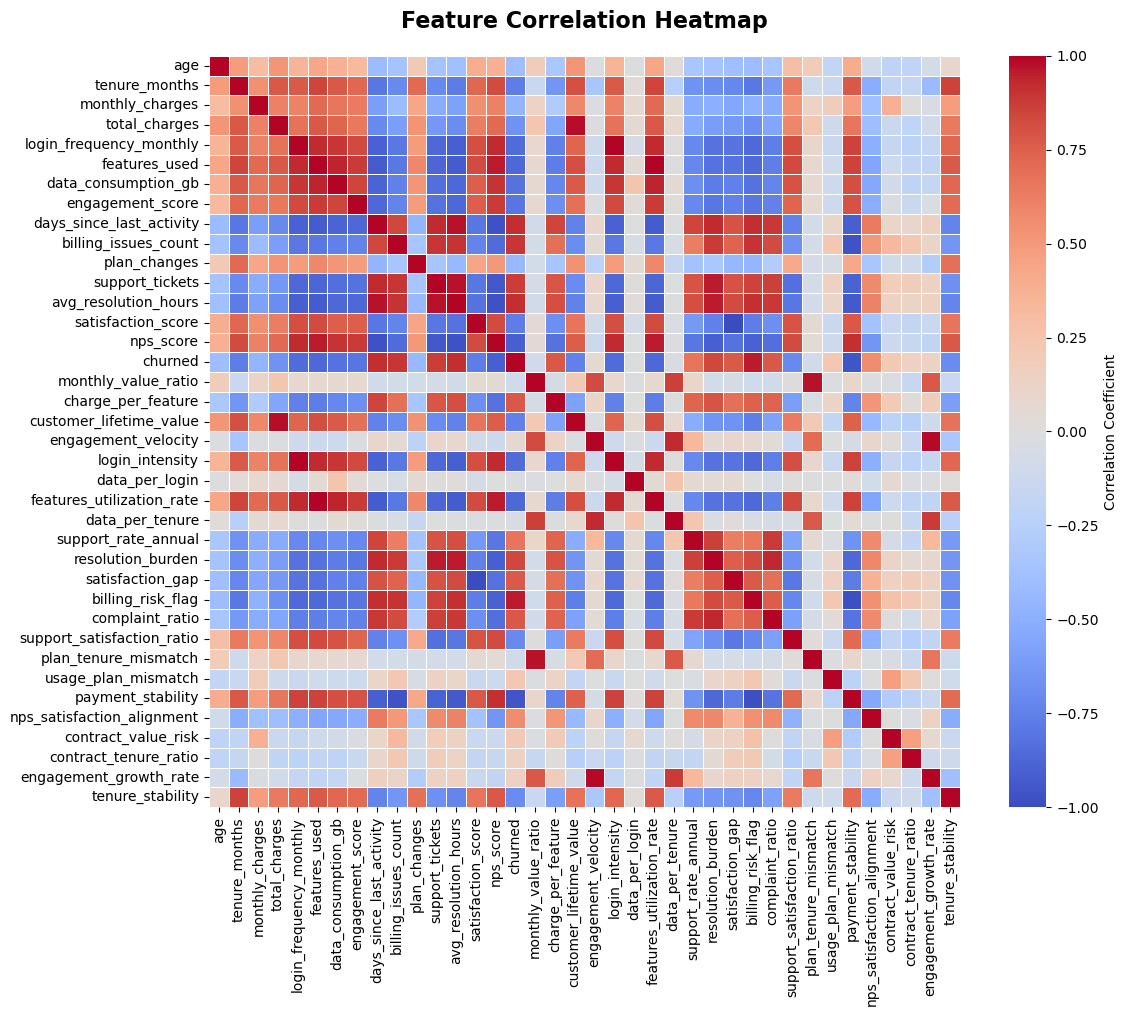


✓ Correlation matrix calculated for 38 numeric features


In [6]:
# Correlation heatmap
plt.figure(figsize=(12, 10))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Create heatmap
sns.heatmap(
    correlation_matrix, 
    cmap='coolwarm', 
    center=0, 
    annot=False,  # Set to True to show correlation values in cells
    fmt='.2f',
    square=True,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../visualizations/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ Correlation matrix calculated for {numeric_df.shape[1]} numeric features")

### Interpretation:
- **Diagonal Line**: Always shows 1.0 (each feature perfectly correlates with itself)
- **Dark Red**: Strong positive correlation
- **Dark Blue**: Strong negative correlation
- **White/Light Colors**: Weak or no correlation
- Look for patterns to identify feature groups that move together

## 7. Top Correlations with Churn

### Purpose:
Identify and rank the features most strongly correlated with customer churn.

### Why This Matters:
- Highlights the most important features for predicting churn
- Guides feature selection for model training
- Provides business insights into what drives customer attrition


=== Top Features Correlated with Churn ===

Positive Correlations (higher value = more likely to churn):
churned                     1.000000
billing_risk_flag           0.960396
days_since_last_activity    0.919422
avg_resolution_hours        0.918211
billing_issues_count        0.892574
support_tickets             0.868556
resolution_burden           0.841694
charge_per_feature          0.780586
complaint_ratio             0.777234
satisfaction_gap            0.772473
Name: churned, dtype: float64

Negative Correlations (higher value = less likely to churn):
tenure_months               -0.771077
satisfaction_score          -0.772473
engagement_score            -0.808143
data_consumption_gb         -0.824415
login_intensity             -0.852045
login_frequency_monthly     -0.852045
features_utilization_rate   -0.868365
features_used               -0.868365
nps_score                   -0.912865
payment_stability           -0.954907
Name: churned, dtype: float64


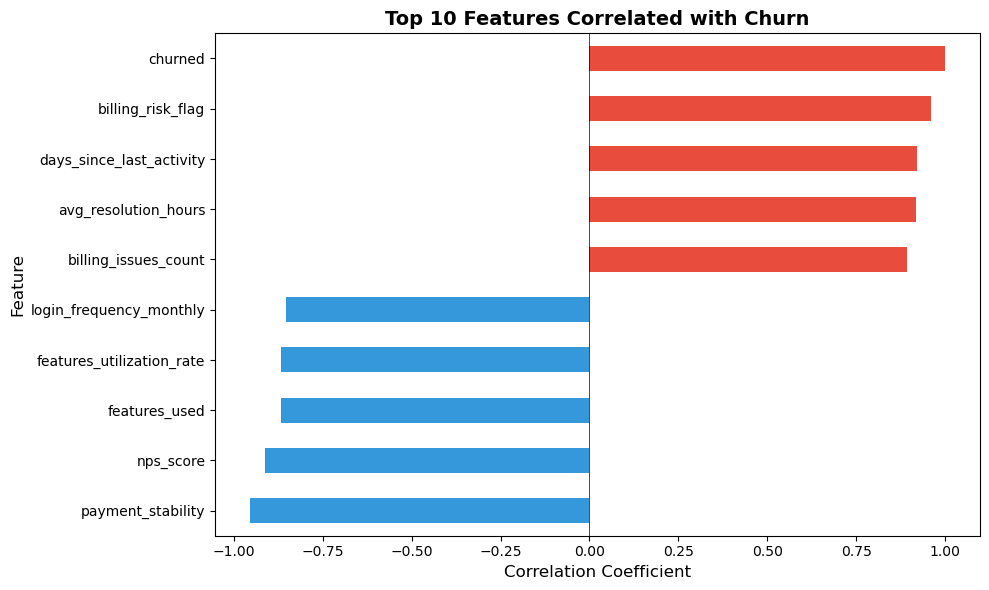

In [7]:
# Find features most correlated with churn
if 'churned' in correlation_matrix.columns:
    churn_correlations = correlation_matrix['churned'].sort_values(ascending=False)
    
    print("\n=== Top Features Correlated with Churn ===\n")
    print("Positive Correlations (higher value = more likely to churn):")
    print(churn_correlations[churn_correlations > 0].head(10))
    
    print("\nNegative Correlations (higher value = less likely to churn):")
    print(churn_correlations[churn_correlations < 0].tail(10))
    
    # Visualize top correlations
    plt.figure(figsize=(10, 6))
    top_features = pd.concat([
        churn_correlations[churn_correlations > 0].head(5),
        churn_correlations[churn_correlations < 0].tail(5)
    ]).sort_values()
    
    colors = ['#e74c3c' if x > 0 else '#3498db' for x in top_features.values]
    top_features.plot(kind='barh', color=colors)
    plt.title('Top 10 Features Correlated with Churn', fontsize=14, fontweight='bold')
    plt.xlabel('Correlation Coefficient', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('../visualizations/churn_correlations.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("⚠️ 'churned' column not found in correlation matrix")

### Interpretation:
- **Red Bars (Positive)**: Features that increase churn likelihood when their value increases
- **Blue Bars (Negative)**: Features that decrease churn likelihood when their value increases
- **Magnitude**: The farther from 0, the stronger the relationship

## 8. Summary

### Key Findings:
The exploratory data analysis has generated the following visualizations:

1. **Churn Distribution**: Shows the balance between churned and retained customers
2. **Correlation Heatmap**: Displays relationships between all numeric features
3. **Churn Correlations**: Highlights the top features most predictive of churn

### Files Generated:
All visualizations are saved in the `visualizations/` folder:
- `churn_distribution.png`
- `correlation_heatmap.png`
- `churn_correlations.png`

### Next Steps:
- Review the correlation patterns to identify potential multicollinearity
- Use the top correlated features as a starting point for feature selection
- Proceed to model training with insights from this analysis
- Consider additional visualizations for specific features of interest

In [8]:
# Final summary
print("\n" + "="*50)
print("✓ EXPLORATORY DATA ANALYSIS COMPLETE")
print("="*50)
print("\n📁 Visualizations saved to '../visualizations/' folder:")
print("  - churn_distribution.png")
print("  - correlation_heatmap.png")
print("  - churn_correlations.png")
print("\n📊 Dataset Summary:")
print(f"  - Total Customers: {len(df):,}")
print(f"  - Total Features: {len(df.columns)}")
print(f"  - Churn Rate: {df['churned'].mean():.2%}")
print("\n🎯 Ready for model training!")


✓ EXPLORATORY DATA ANALYSIS COMPLETE

📁 Visualizations saved to '../visualizations/' folder:
  - churn_distribution.png
  - correlation_heatmap.png
  - churn_correlations.png

📊 Dataset Summary:
  - Total Customers: 100
  - Total Features: 48
  - Churn Rate: 44.00%

🎯 Ready for model training!
